In [1]:
import pandas as pd

In [ ]:
!pip install mplcursors
!pip install nltk
!pip install geotext
!pip install geopy
!pip install folium
!pip install spacy
!python -m spacy download de_core_news_sm
!pip install geopandas
!pip install textblob

In [9]:
data = pd.read_csv('..\\data\\processed\\songs_complete_final_no_nan.csv')

In [10]:
data.value_counts('genre')
data.head()

,artist,artist_id,album,album_id,release_date,title,full_title,song_id,lyrics,release_year,weekday,genre,genre_cat,word_count,labels
0,1099,209826,10999,831505,2021-10-29,INTRO (10999),INTRO (10999) by King Khalil,7337100,"Powpow Dicka, das kein Rap mehr, das ist Kind...",2021,Friday,post-rock,Rock,60,0
1,1099,209826,10999,831505,2021-10-29,GIB IHM,GIB IHM by King Khalil & AK 33,7337102,"Gefährliche, gefährliche KiKiKiKi Gefährliche ...",2021,Friday,post-rock,Rock,92,0
2,1099,209826,KING KONG,546439,2020-01-31,BUNDESWEIT,BUNDESWEIT by King Khalil (Ft. Fler),4532899,Aus meiner Stadt fliegen Leuchtclips und Bresl...,2020,Friday,post-rock,Rock,113,0
3,1099,209826,KING KONG,546439,2020-01-31,HOLLANDA,HOLLANDA by King Khalil (Ft. Mert),5189158,Because youre so sweet You lift up my heart An...,2020,Friday,post-rock,Rock,80,0
4,1099,209826,KING KONG,546439,2020-01-31,MOON,MOON by King Khalil & Lil Lano,5109178,. Liquid Swords GZA Actual . souljaboytellem...,2020,Friday,post-rock,Rock,233,0


# 1.In welchem Monat wurden die meisten Songs released nach Genre (oder allgemein)

In [140]:
# Extrahiere den Monat aus der Spalte "release_date_for_display" und füge ihn in eine neue Spalte namens "month" ein
data["month"] = pd.to_datetime(data["release_date"]).dt.month.fillna(0).astype(int)

# Zeige das DataFrame mit der neuen "month"-Spalte an
year_1982_data = data[data["release_year"] == 1982]
year_1982_data



,artist,artist_id,album,album_id,release_date,title,full_title,song_id,lyrics,release_year,weekday,genre,genre_cat,word_count,labels,month,sentiment,contains_liebe
11662,Nina Hagen,31286,NunSexMonkRock,168350,1982-06-12,Dread Love,Dread Love by Nina Hagen,889165,Praise the Lord everyday with Dread love Du mu...,1982,Saturday,new wave,Pop,94,2,6,0.353571,False
14579,Spider Murphy Gang,355209,Tutti Frutti,282676,1982-01-01,Reißverschluß,Reißverschluß by Spider Murphy Gang,6070773,I fahrs hoam nach der Disco mittn in der Nacht...,1982,Friday,ndw,Pop,86,2,1,0.066667,False
14580,Spider Murphy Gang,355209,Tutti Frutti,282676,1982-01-01,So a schöner Tag,So a schöner Tag by Spider Murphy Gang,1626122,Ja der Montag is ma zwider Und i muaß wieder i...,1982,Friday,ndw,Pop,84,2,1,0.000000,False
14581,Spider Murphy Gang,355209,Tutti Frutti,282676,1982-01-01,Freizeit 81,Freizeit 81 by Spider Murphy Gang,871798,D Landsbergerstraß liegt ruhig im Licht der Ne...,1982,Friday,ndw,Pop,61,2,1,0.000000,False
14582,Spider Murphy Gang,355209,Tutti Frutti,282676,1982-01-01,I wander aus,I wander aus by Spider Murphy Gang,1718142,Ich packe meine Sieben Sachen Und mache mich a...,1982,Friday,ndw,Pop,56,2,1,0.000000,False
14583,Spider Murphy Gang,355209,Tutti Frutti,282676,1982-01-01,A nackerte Prinzessin,A nackerte Prinzessin by Spider Murphy Gang,1668030,"Am .., Uhr is wieder moi soweit Jetz derf ma...",1982,Friday,ndw,Pop,53,2,1,0.000000,False
14584,Spider Murphy Gang,355209,Tutti Frutti,282676,1982-01-01,Schwierigkeiten,Schwierigkeiten by Spider Murphy Gang,1507754,Mit meim Vater sein Wogn hob i a Spritztour gm...,1982,Friday,ndw,Pop,122,2,1,0.000000,False


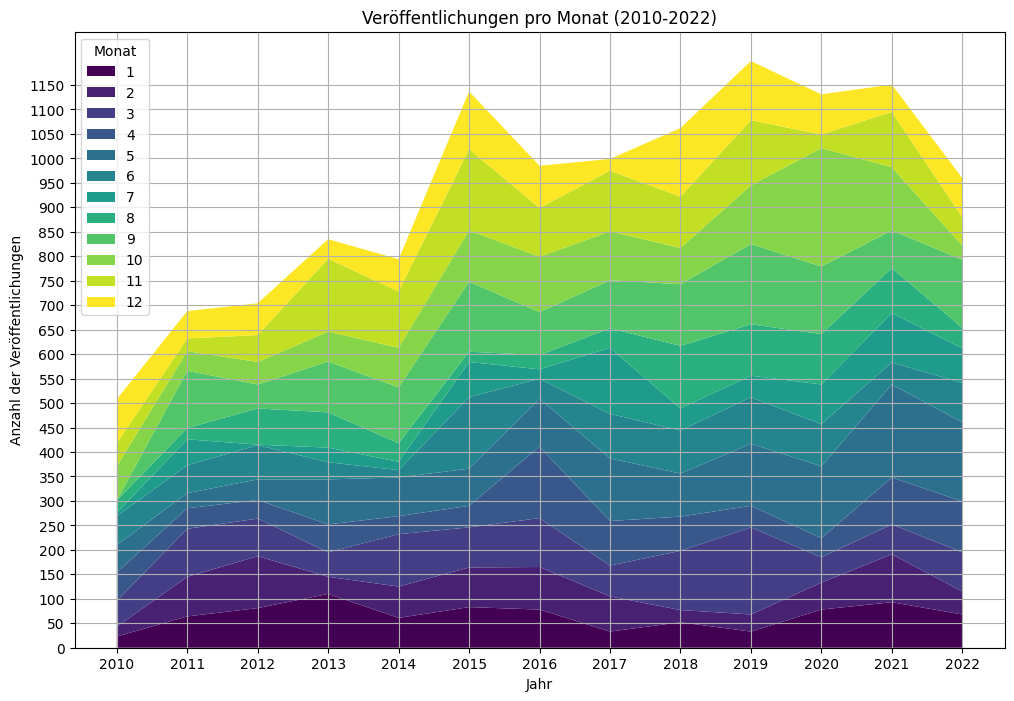

In [141]:
import matplotlib.pyplot as plt
import numpy as np

# Filtere den DataFrame für den Zeitraum von 2010 bis 2022
filtered_data = data[(data['release_year'] >= 2010) & (data['release_year'] <= 2022)]

# Zähle die Anzahl der eindeutigen Veröffentlichungen pro Monat pro Jahr
releases_per_month = filtered_data.groupby(['release_year', 'month']).size().unstack().fillna(0)

# Definiere die Farben für jeden Monat
num_months = releases_per_month.shape[1]
colors = plt.cm.viridis(np.linspace(0, 1, num_months))

# Plotten des gestapelten Liniendiagramms mit individuellen Farben pro Monat
fig, ax = plt.subplots(figsize=(12, 8))
lines = ax.stackplot(
    releases_per_month.index,
    releases_per_month.values.T,
    labels=releases_per_month.columns,
    colors=colors
)

# Einstellungen für das Diagramm
ax.set_xlabel("Jahr")
ax.set_ylabel("Anzahl der Veröffentlichungen")
ax.set_title("Veröffentlichungen pro Monat (2010-2022)")
ax.legend(title="Monat", loc="upper left")
ax.grid(True)

# Anpassung der Achsenbeschriftungen
ax.set_xticks(releases_per_month.index)
max_value = np.sum(releases_per_month.values, axis=1).max()
ax.set_yticks(range(0, int(max_value) + 1, 50))

# Anzeigen des Diagramms
plt.show()


In [143]:
data_2013 = data[data["release_year"] == 2013]

# Gruppiere nach Monat und Genre und summiere die Anzahl der Songs
songs_per_month_genre = data_2013.groupby(["month", "genre"])["title"].count()

# Zeige das Ergebnis an
print(songs_per_month_genre)


month  genre     
1      deutschrap    47
       pop           12
       rap           21
       schlager      30
2      deutschrap    10
       rock          10
       schlager      15
3      ambient        1
       deutschrap    33
       pop            7
       punk rock      5
       rap            4
4      deutschrap    15
       pop           13
       rap           10
       rock          19
5      pop           56
       rap           16
       rock          19
       schlager       1
6      deutschrap    20
       party          3
       schlager      12
7      hip hop       14
       hip-hop        3
       rap           13
8      deutschrap    32
       hip-hop       15
       punk rock      3
       rap           21
       rock           1
9      ambient        4
       deutschrap    62
       hip-hop       16
       pop           22
10     deutschrap    13
       hip-hop       18
       indie         14
       rap            1
       schlager      15
11     deutschrap    1

# 2.Welche Orte werden in Rap Songs genannt auf Landkarte Visualisieren

In [36]:
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import spacy

# Laden des Spacy-Modells
nlp_spacy = spacy.load("de_core_news_sm")  # Passe das gewünschte Spacy-Modell an

lyrics_column = data["lyrics"]

def extract_locations(text):
    # Spacy für die Named Entity Recognition verwenden
    doc = nlp_spacy(text)
    locations_spacy = [ent.text.lower() for ent in doc.ents if ent.label_ == "LOC"]

    return locations_spacy

location_list = []
for lyrics in lyrics_column:
    locations = extract_locations(lyrics)
    location_list.extend(locations)

stop_words = set(stopwords.words("german"))  # Verwende die passende Sprache für die Stoppwörter
location_list = [location for location in location_list if location not in stop_words]

most_common_locations = Counter(location_list).most_common(50)

for location, count in most_common_locations:
    print(f"{location}: {count}")


mach: 801
oh: 559
berlin: 457
erde: 423
straße: 419
deutschland: 320
baby: 292
warn: 284
digga: 278
egal: 260
knast: 238
nein: 232
mond: 223
benz: 215
paris: 186
nutte: 182
stadt: 178
hause: 171
einfach: 168
arsch: 167
dicka: 149
armen: 140
sag: 138
hamburg: 132
koks: 129
wand: 122
weißt du: 114
wien: 114
yeah: 109
lippen: 102
na: 96
frankfurt: 95
kollegah: 86
lass: 84
bang: 83
dreck: 82
bullen: 78
problem: 78
habt: 78
stein: 75
maybach: 75
kripo: 72
new york: 72
wieso: 71
patte: 68
koka: 68
finger: 67
nebel: 66
mucke: 64
garten: 64


Versuch einer Lösung mit Spacy gibt nicht die erwünschten Ergebnisse. Nächster Versuch mit GeoText.

In [58]:
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from geotext import GeoText

lyrics_column = data["lyrics"]

def extract_locations(text):
    # Geotext für die Extraktion von Orten verwenden
    geo = GeoText(text)
    locations_geotext = list(set(geo.cities))  # Entferne Duplikate

    return locations_geotext

location_list = []
for lyrics in lyrics_column:
    locations = extract_locations(lyrics)
    location_list.extend(locations)

stop_words = set(stopwords.words("german"))  # Verwende die passende Sprache für die Stoppwörter
location_list = [location for location in location_list if location not in stop_words]

location_counter = Counter(location_list)  # Counter verwenden, um die Häufigkeit der Orte zu zählen
most_common_locations = location_counter.most_common(100)

# DataFrame erstellen
df_locations = pd.DataFrame(most_common_locations, columns=['Location', 'Count'])

# Ausgabe des DataFrames
print(df_locations)


       Location  Count
0          Ende    732
1           Wer    709
2          Auch    683
3           Man    598
4         Boden    487
..          ...    ...
95         Holt      9
96         Born      9
97        Kanye      9
98  Miami Beach      9
99     Marlboro      9

[100 rows x 2 columns]


In [59]:
print(df_locations.head(20))


    Location  Count
0       Ende    732
1        Wer    709
2       Auch    683
3        Man    598
4      Boden    487
5       Mach    430
6     Berlin    262
7        Zug    187
8        Mut    164
9      Essen    156
10       Bar    123
11  Mercedes    122
12       Bra    118
13    Keller     97
14     Paris     95
15   Hamburg     94
16        Un     89
17  New York     88
18      Ware     81
19      Lage     72


#### Manuelle Löschung der Einzelnen falschen Werte

In [60]:
index_to_delete = [0,1,2,3,4,5,7,8,9,10,11,12,13,16,18,19]  # Index des zu löschenden Beitrags

# Verwende den Index, um den Beitrag aus dem DataFrame zu löschen
df_locations = df_locations.drop(index_to_delete)


In [64]:
print(df_locations.head(30))
index_to_delete = [20,21,22,23,24,26,27,28,29,30,31,32,33,34,38,39,43,44,45]  # Index des zu löschenden Beitrags

# Verwende den Index, um den Beitrag aus dem DataFrame zu löschen
df_locations = df_locations.drop(index_to_delete)



     Location  Count
6      Berlin    262
14      Paris     95
15    Hamburg     94
17   New York     88
20       Haar     69
21    Bentley     60
22      Mitte     60
23       Date     53
24       Deal     52
25  Hollywood     47
26      Eisen     43
27        Hof     38
28         Ho     37
29      Waren     36
30       Boom     31
31     Spring     30
32      Adler     28
33     Leiden     28
34     Norden     27
35      Miami     27
36  Las Vegas     27
37  Offenbach     26
38        Bam     25
39       Cali     25
40       Köln     25
41       Raub     24
42  Amsterdam     23
43      Silla     23
44      Ganja     23
45    Tequila     23


In [66]:
print(df_locations.head(30))
index_to_delete = [41,47,48,52,53,54,55,57,58,61,62]  # Index des zu löschenden Beitrags

# Verwende den Index, um den Beitrag aus dem DataFrame zu löschen
df_locations = df_locations.drop(index_to_delete)

     Location  Count
6      Berlin    262
14      Paris     95
15    Hamburg     94
17   New York     88
25  Hollywood     47
35      Miami     27
36  Las Vegas     27
37  Offenbach     26
40       Köln     25
41       Raub     24
42  Amsterdam     23
46      Dubai     23
47       Bela     22
48      Gummi     22
49    Holland     21
50  Stuttgart     20
51     London     20
52      Halle     20
53     Gerede     20
54    Vincent     19
55        Pop     18
56   Dortmund     17
57     Batman     17
58    Mission     17
59      Tapes     17
60     Police     16
61     Normal     16
62      Klang     16
63  Kreuzberg     16
64       Bonn     15


In [68]:
print(df_locations.head(30))
index_to_delete = [59,60,65,66,69,72,74]  # Index des zu löschenden Beitrags

# Verwende den Index, um den Beitrag aus dem DataFrame zu löschen
df_locations = df_locations.drop(index_to_delete)

      Location  Count
6       Berlin    262
14       Paris     95
15     Hamburg     94
17    New York     88
25   Hollywood     47
35       Miami     27
36   Las Vegas     27
37   Offenbach     26
40        Köln     25
42   Amsterdam     23
46       Dubai     23
49     Holland     21
50   Stuttgart     20
51      London     20
56    Dortmund     17
59       Tapes     17
60      Police     16
63   Kreuzberg     16
64        Bonn     15
65        Mula     15
66       Picos     15
67  Schöneberg     15
68     Compton     15
69      Bergen     15
70        Anna     14
71       Tanga     14
72     Crystal     14
73       Ibiza     14
74        Chor     14
75     Montana     13


In [70]:
print(df_locations.head(30))
index_to_delete = [70,71,76,79,81,82]  # Index des zu löschenden Beitrags

# Verwende den Index, um den Beitrag aus dem DataFrame zu löschen
df_locations = df_locations.drop(index_to_delete)

      Location  Count
6       Berlin    262
14       Paris     95
15     Hamburg     94
17    New York     88
25   Hollywood     47
35       Miami     27
36   Las Vegas     27
37   Offenbach     26
40        Köln     25
42   Amsterdam     23
46       Dubai     23
49     Holland     21
50   Stuttgart     20
51      London     20
56    Dortmund     17
63   Kreuzberg     16
64        Bonn     15
67  Schöneberg     15
68     Compton     15
70        Anna     14
71       Tanga     14
73       Ibiza     14
75     Montana     13
76       Tokat     13
77   Tempelhof     12
78      Singen     12
79       Nador     12
80   Rotterdam     11
81          Bo     11
82      Latina     11


In [75]:
print(df_locations[18:31])
index_to_delete = [78,83,89]  # Index des zu löschenden Beitrags

# Verwende den Index, um den Beitrag aus dem DataFrame zu löschen
df_locations = df_locations.drop(index_to_delete)


         Location  Count
68        Compton     15
73          Ibiza     14
75        Montana     13
77      Tempelhof     12
78         Singen     12
80      Rotterdam     11
83           Kobe     11
84      Barcelona     11
85      Abu Dhabi     11
86  Beverly Hills     11
87    Los Angeles     11
88        Chicago     10
89         Casper     10


In [82]:
print(df_locations[1:29])



         Location  Count
14          Paris     95
15        Hamburg     94
17       New York     88
25      Hollywood     47
35          Miami     27
36      Las Vegas     27
37      Offenbach     26
40           Köln     25
42      Amsterdam     23
46          Dubai     23
49        Holland     21
50      Stuttgart     20
51         London     20
56       Dortmund     17
63      Kreuzberg     16
64           Bonn     15
67     Schöneberg     15
68        Compton     15
73          Ibiza     14
75        Montana     13
77      Tempelhof     12
80      Rotterdam     11
84      Barcelona     11
85      Abu Dhabi     11
86  Beverly Hills     11
87    Los Angeles     11
88        Chicago     10
90           York     10
         Location  Count
0           Paris     95
1         Hamburg     94
2        New York     88
3       Hollywood     47
4           Miami     27
5       Las Vegas     27
6       Offenbach     26
7            Köln     25
8       Amsterdam     23
9           Dubai     23


In [87]:
df_locations_cleaned = df_locations[0:29].reset_index(drop=True)
print(df_locations_cleaned)

         Location  Count
0          Berlin    262
1           Paris     95
2         Hamburg     94
3        New York     88
4       Hollywood     47
5           Miami     27
6       Las Vegas     27
7       Offenbach     26
8            Köln     25
9       Amsterdam     23
10          Dubai     23
11        Holland     21
12      Stuttgart     20
13         London     20
14       Dortmund     17
15      Kreuzberg     16
16           Bonn     15
17     Schöneberg     15
18        Compton     15
19          Ibiza     14
20        Montana     13
21      Tempelhof     12
22      Rotterdam     11
23      Barcelona     11
24      Abu Dhabi     11
25  Beverly Hills     11
26    Los Angeles     11
27        Chicago     10
28           York     10


# Durch die manuelle Löschung haben wir nun eine korrekte Liste der Locations, wobei Orte wie Essen und Halle entfernt wurde. Jeder Ort wird pro Song nur einmal gezählt. Was also trotz mehr Daten weniger Erwähnungen von Berlin hinterlässt.

In [88]:
df_locations_cleaned


,Location,Count
0,Berlin,262
1,Paris,95
2,Hamburg,94
3,New York,88
4,Hollywood,47
5,Miami,27
6,Las Vegas,27
7,Offenbach,26
8,Köln,25
9,Amsterdam,23


# Top 29 Orte auf der Welt mit ihrer Anzahl der Vorkommnisse, pro Song ist jeder Ort nur einmal gezählt worden

In [91]:
import folium
import pandas as pd
from geopy.geocoders import Nominatim

# Erstelle eine Karte mit Folium
m = folium.Map(location=[0, 0], zoom_start=2)

# Erstelle einen Farbverlauf für die Häufigkeit
max_count = df_locations_cleaned['Count'].max()
color_scale = folium.LinearColormap(['green', 'yellow', 'red', 'blue'], vmin=0, vmax=50)

# Markiere die Standorte auf der Karte mit Farben basierend auf der Häufigkeit
for index, row in df_locations_cleaned.iterrows():
    location = row['Location']
    count = row['Count']
    geolocator = Nominatim(user_agent="my_app")
    geocode = geolocator.geocode(location)
    if geocode is not None:
        lat = geocode.latitude
        lon = geocode.longitude
        if count > 50:
            # Ausreißer-Markierung in blauer Farbe
            color = 'blue'
        else:
            # Farbe basierend auf der Häufigkeit
            color = color_scale(count)
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            tooltip=f"{location}: {count}"
        ).add_to(m)

# Füge den Farbverlauf zur Karte hinzu
color_scale.caption = 'Häufigkeit'
m.add_child(color_scale)

# Anzeigen der Karte
m


Beispielsatz bilden, tags angucken und tag unterschiede raussuchen die städte identifizieren

In [93]:
import folium
import pandas as pd
from geopy.geocoders import Nominatim

# Erstelle eine Karte mit Folium
m = folium.Map(location=[0, 0], zoom_start=2)

# Markiere die Standorte auf der Karte
for index, row in df_locations_cleaned.iterrows():
    location = row['Location']
    count = row['Count']
    geolocator = Nominatim(user_agent="my_app")
    geocode = geolocator.geocode(location)
    if geocode is not None:
        lat = geocode.latitude
        lon = geocode.longitude
        folium.CircleMarker(
            location=[lat, lon],
            radius=count/10,
            color='blue',
            fill=True,
            fill_color='blue'
        ).add_to(m)

# Anzeigen der Karte
m
#Größe = Häufigkeit


In [95]:
import folium
import pandas as pd

# Erstelle eine Karte mit Folium
m = folium.Map(location=[0, 0], zoom_start=2)

# Markiere die Standorte auf der Karte
for index, row in df_locations_cleaned.iterrows():
    location = row['Location']
    count = row['Count']
    geolocator = Nominatim(user_agent="my_app")
    geocode = geolocator.geocode(location)
    if geocode is not None:
        lat = geocode.latitude
        lon = geocode.longitude
        popup_text = f"Location: {location}<br>Count: {count}"
        folium.Marker(
            location=[lat, lon],
            popup=popup_text
        ).add_to(m)

# Anzeigen der Karte
m


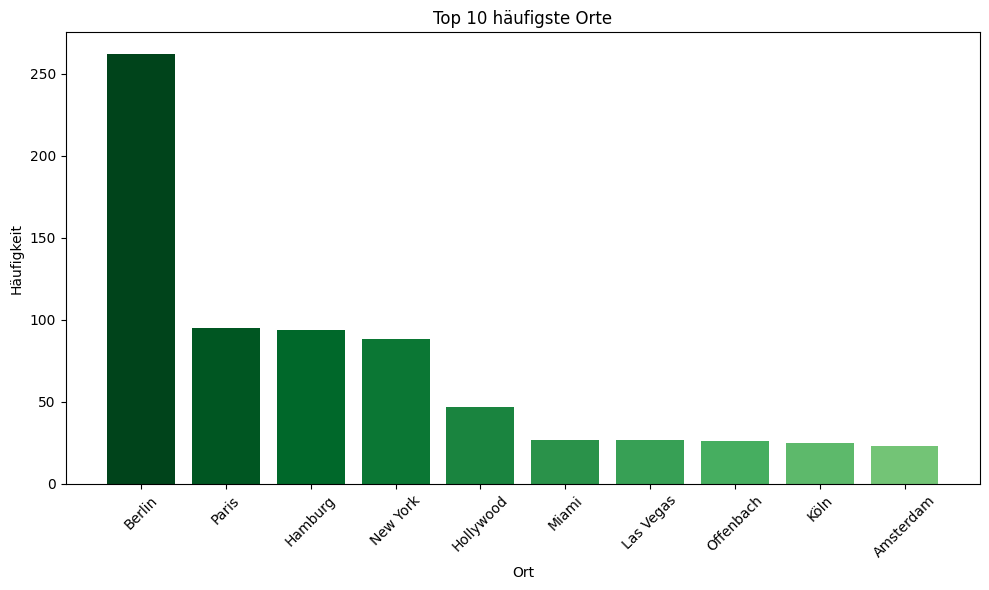

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Top 10 häufigste Orte
top10_locations_counts = df_locations_cleaned.head(10)

# Farbverlauf definieren
colors = plt.cm.Greens(np.linspace(1, 0.5, len(top10_locations_counts)))

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
plt.bar(top10_locations_counts['Location'], top10_locations_counts['Count'], color=colors)
plt.xlabel('Ort')
plt.ylabel('Häufigkeit')
plt.title('Top 10 häufigste Orte')
plt.xticks(rotation=45)
plt.tight_layout()

# Diagramm anzeigen
plt.show()


# 3.In wie vielen Songs kommt da Thema Liebe vor , pro Genre vielleicht

C:\Users\marcb\AppData\Local\Temp\ipykernel_23308\204171601.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap("cool")


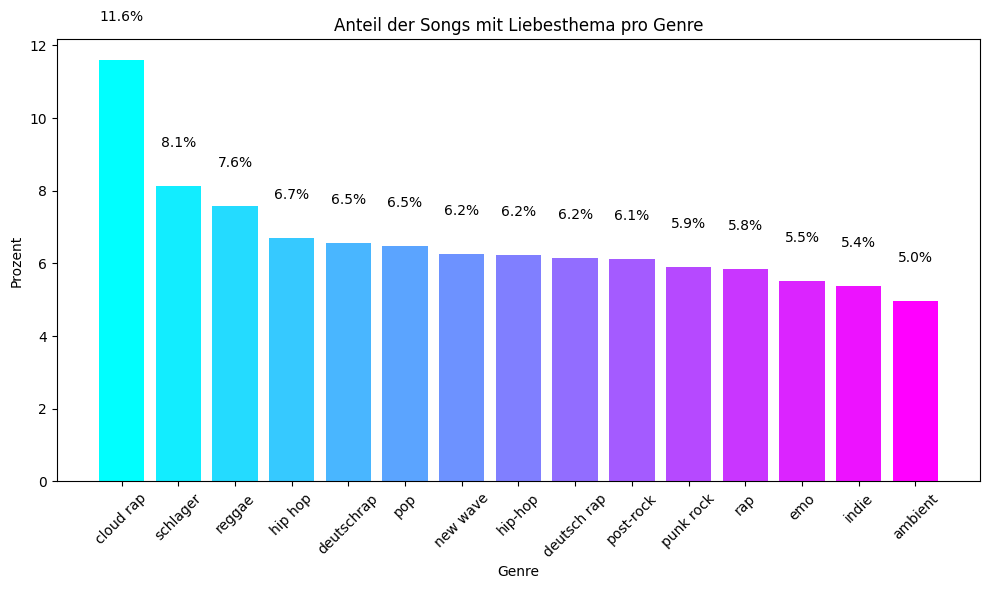

In [102]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np

# 1. Lade die Liste der Liebeswörter
with open("../data/raw/liebe_sentiment.txt", "r", encoding="utf-8") as f:
    liebe_wörter = [line.strip() for line in f.readlines()]

# 2. Sentiment-Analyse auf dem Lyrics-Feld ausführen
data["sentiment"] = data["lyrics"].apply(lambda x: TextBlob(x).sentiment.polarity)

# 3. Durchsuche das DataFrame nach Liebesworten
data["contains_liebe"] = data["lyrics"].apply(lambda x: any([liebe_wort.lower() in x.lower() for liebe_wort in liebe_wörter]))

# 4. Gruppierung und Berechnung des Prozentsatzes der Songs pro Genre, die das Thema Liebe enthalten
liebe_prozent = data.groupby("genre")["contains_liebe"].mean() * 100

# Sortiere die Werte in absteigender Reihenfolge
liebe_prozent = liebe_prozent.sort_values(ascending=False)

# Wähle die obersten 15 Genres aus
top_genres = liebe_prozent[:15]

# Erzeuge einen Farbverlauf für die Balken
color_map = plt.cm.get_cmap("cool")
colors = color_map(np.linspace(0, 1, len(top_genres)))

# 5. Visualisierung des Ergebnisses als Balkendiagramm
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_genres.index, top_genres, color=colors)

# Beschrifte die Balken mit den Prozentzahlen
for i, v in enumerate(top_genres):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

ax.set_xlabel("Genre")
ax.set_ylabel("Prozent")
ax.set_title("Anteil der Songs mit Liebesthema pro Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


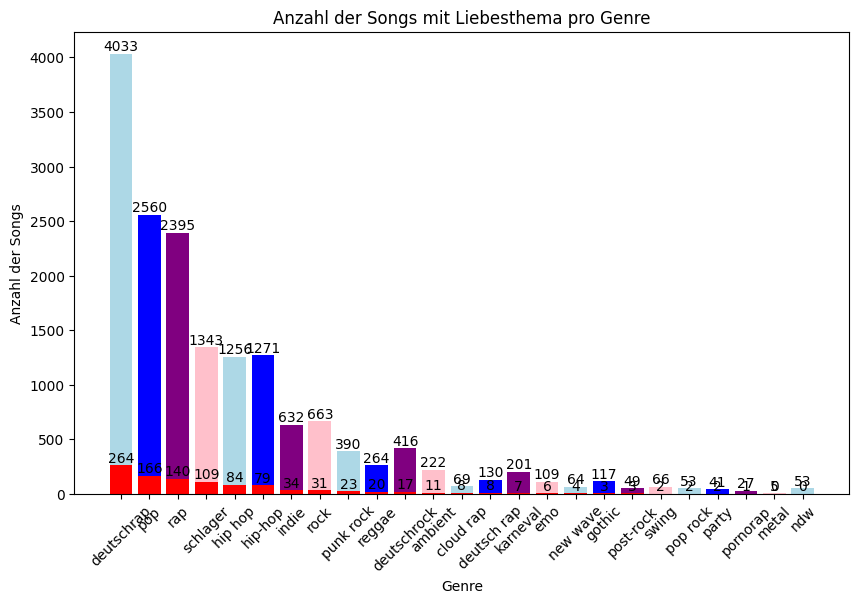

In [145]:
import matplotlib.pyplot as plt

# 1. Lade die Liste der Liebeswörter
with open("../data/raw/liebe_sentiment.txt", "r", encoding="utf-8") as f:
    liebe_wörter = [line.strip() for line in f.readlines()]

# 2. Durchsuche das DataFrame nach Liebesworten pro Genre und zähle die Anzahl der Songs
liebe_anzahl = data.groupby("genre")["lyrics"].apply(lambda x: x.str.contains('|'.join(liebe_wörter), case=False, regex=True).sum())
gesamt_anzahl = data.groupby("genre").size()

# 3. Berechne den Prozentsatz der Liebessongs pro Genre
prozentsatz_liebe = (liebe_anzahl / gesamt_anzahl) * 100

# Sortiere die Werte in absteigender Reihenfolge
liebe_anzahl = liebe_anzahl.sort_values(ascending=False)
gesamt_anzahl = gesamt_anzahl.reindex(liebe_anzahl.index)
prozentsatz_liebe = prozentsatz_liebe.reindex(liebe_anzahl.index)

# 4. Visualisierung des Ergebnisses als Balkendiagramm
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['lightblue', 'blue', 'purple', 'pink']
x_pos = range(len(liebe_anzahl))
ax.bar(x_pos, gesamt_anzahl, color=colors, label='Gesamt')
ax.bar(x_pos, liebe_anzahl, color='red', label='Liebeslieder')
ax.set_xlabel("Genre")
ax.set_ylabel("Anzahl der Songs")
ax.set_title("Anzahl der Songs mit Liebesthema pro Genre")

# Beschrifte die Balken mit den Werten
for i, v in enumerate(gesamt_anzahl):
    ax.text(i, v, str(v), ha='center', va='bottom')
for i, v in enumerate(liebe_anzahl):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Setze die Genre-Namen als x-Achsenbeschriftung mit 45 Grad Rotation
ax.set_xticks(x_pos)
ax.set_xticklabels(liebe_anzahl.index, rotation=45)

plt.show()


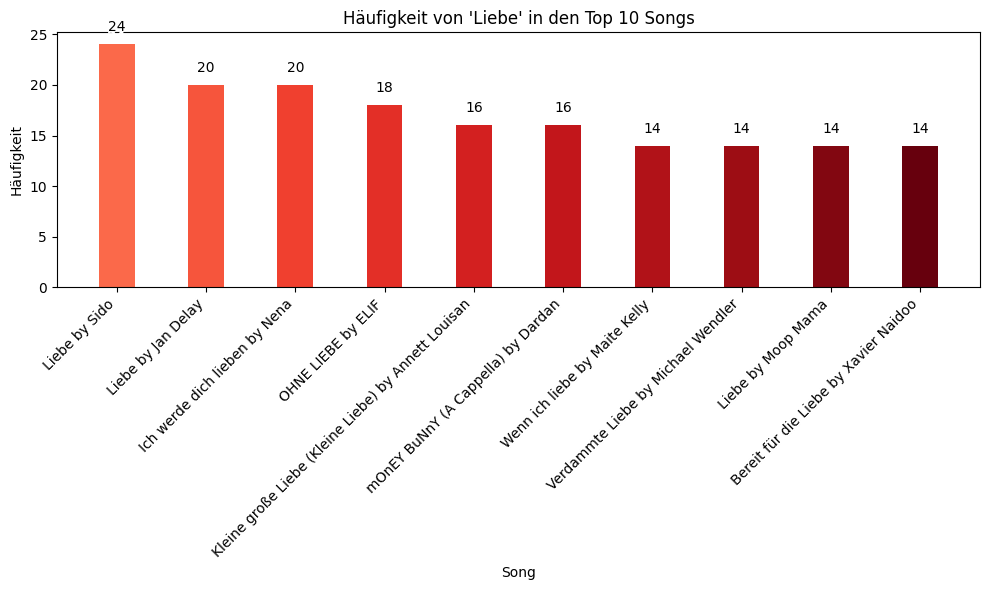

In [123]:
import matplotlib.pyplot as plt
import numpy as np

# Zähle die Häufigkeit des Worts "Liebe" für alle Songs
liebe_haeufigkeiten = data['lyrics'].str.lower().str.count('liebe')

# Erstelle eine Liste der Top 10 Songs mit den meisten Vorkommnissen von "Liebe"
top_10_songs = data.loc[liebe_haeufigkeiten.nlargest(10).index, 'full_title']
top_10_haeufigkeiten_liebe = liebe_haeufigkeiten.loc[top_10_songs.index]

# Erstelle den Farbverlauf für "Liebe"
colors_liebe = plt.cm.Reds(np.linspace(0.5, 1, len(top_10_songs)))

# Visualisierung der Häufigkeit von "Liebe"
fig, ax = plt.subplots(figsize=(10, 6))
x_pos = range(len(top_10_songs))
width = 0.4

ax.bar(x_pos, top_10_haeufigkeiten_liebe, width, color=colors_liebe)

ax.set_xlabel("Song")
ax.set_ylabel("Häufigkeit")
ax.set_title("Häufigkeit von 'Liebe' in den Top 10 Songs")
ax.set_xticks(x_pos)
ax.set_xticklabels(top_10_songs, rotation=45, ha='right')

# Beschrifte die Balken mit den Werten
for i, v in enumerate(top_10_haeufigkeiten_liebe):
    ax.text(i, v, str(v), ha='center', va='bottom', color='white', fontweight='bold')
    ax.text(i, v + 1, str(v), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()



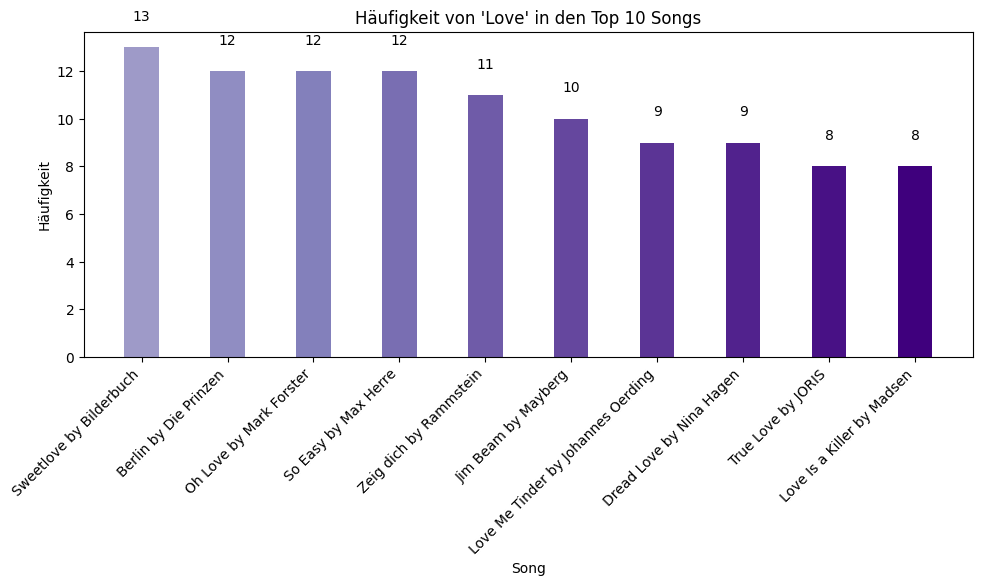

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Zähle die Häufigkeit des Worts "Love" für alle Songs
love_haeufigkeiten = data['lyrics'].str.lower().str.count('love')

# Erstelle eine Liste der Top 10 Songs mit den meisten Vorkommnissen von "Love"
top_10_songs = data.loc[love_haeufigkeiten.nlargest(10).index, 'full_title']
top_10_haeufigkeiten_love = love_haeufigkeiten.loc[top_10_songs.index]

# Erstelle den Farbverlauf für "Love"
colors_love = plt.cm.Purples(np.linspace(0.5, 1, len(top_10_songs)))

# Visualisierung der Häufigkeit von "Love"
fig, ax = plt.subplots(figsize=(10, 6))
x_pos = range(len(top_10_songs))
width = 0.4

ax.bar(x_pos, top_10_haeufigkeiten_love, width, color=colors_love)

ax.set_xlabel("Song")
ax.set_ylabel("Häufigkeit")
ax.set_title("Häufigkeit von 'Love' in den Top 10 Songs")
ax.set_xticks(x_pos)
ax.set_xticklabels(top_10_songs, rotation=45, ha='right')

# Beschrifte die Balken mit den Werten
for i, v in enumerate(top_10_haeufigkeiten_love):
    ax.text(i, v, str(v), ha='center', va='bottom', color='white', fontweight='bold')
    ax.text(i, v + 1, str(v), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

